In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [21]:
customers_df = pd.read_csv('/content/Customers.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')

In [22]:
data = transactions_df.merge(customers_df, on="CustomerID")

In [23]:
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean'],
    'TransactionID': 'count'
}).reset_index()

In [24]:
customer_features.columns = ['CustomerID', 'TotalSpending', 'AvgSpending', 'TotalTransactions']

In [25]:
customer_features = customer_features.merge(customers_df[['CustomerID', 'Region']], on="CustomerID")

In [26]:
label_encoder = LabelEncoder()
customer_features['RegionEncoded'] = label_encoder.fit_transform(customer_features['Region'])

In [27]:
customer_features = customer_features.drop(['Region', 'CustomerID'], axis=1)

In [28]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(customer_features)

In [93]:
db_scores = []
silhouette_scores = []
k_range = range(4, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(normalized_features)
    db_scores.append(davies_bouldin_score(normalized_features, clusters))
    silhouette_scores.append(silhouette_score(normalized_features, clusters))

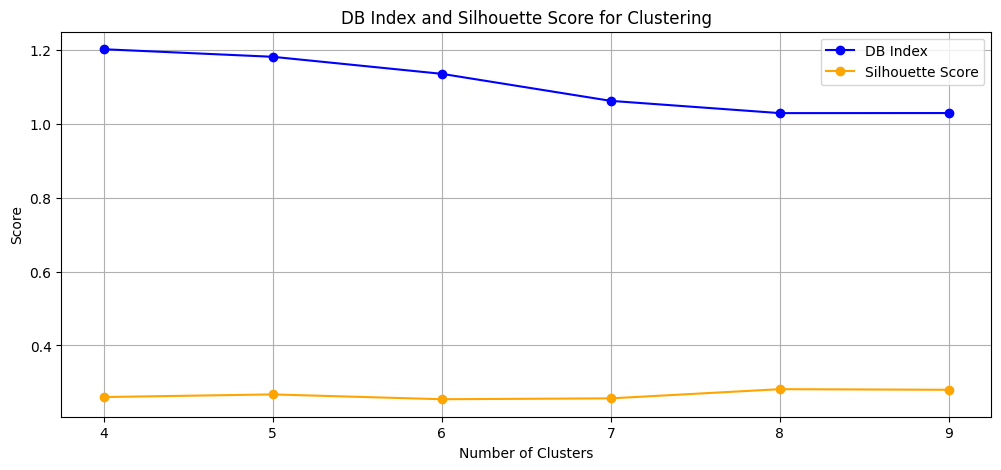

In [94]:
plt.figure(figsize=(12, 5))
plt.plot(k_range, db_scores, marker='o', label='DB Index', color='blue')
plt.plot(k_range, silhouette_scores, marker='o', label='Silhouette Score', color='orange')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("DB Index and Silhouette Score for Clustering")
plt.legend()
plt.grid()
plt.show()

In [95]:
optimal_k = k_range[np.argmin(db_scores)]
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 8


In [96]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(normalized_features)

In [97]:
db_index = davies_bouldin_score(normalized_features, customer_features['Cluster'])
silhouette = silhouette_score(normalized_features, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette}")

Davies-Bouldin Index: 1.0296236411602058
Silhouette Score: 0.2815420274993098


In [98]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(normalized_features)
customer_features['PCA1'] = pca_features[:, 0]
customer_features['PCA2'] = pca_features[:, 1]

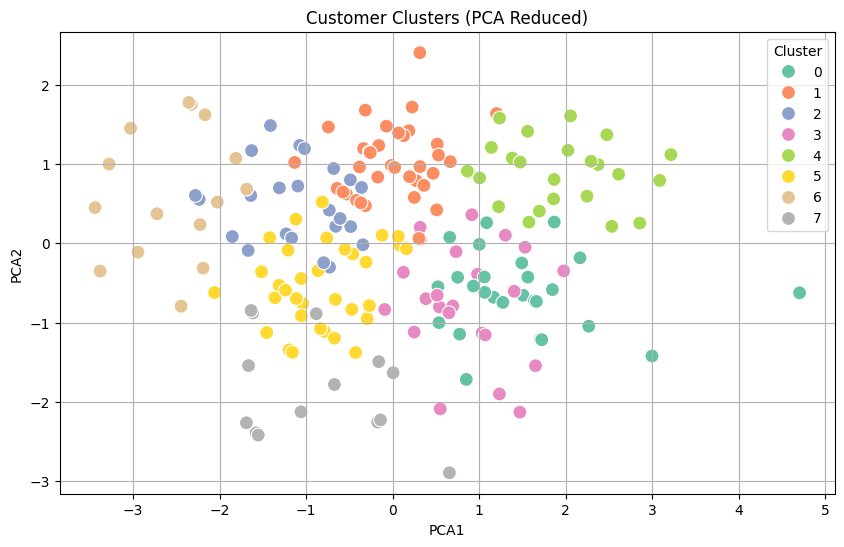

In [99]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_features, palette='Set2', s=100)
plt.title("Customer Clusters (PCA Reduced)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title='Cluster')
plt.grid()
plt.show()